In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
from pathlib import Path
from keras.models import load_model

from config import config
from src.trading_evaluation.model_evaluation import evaluate_and_plot
from src.trading_evaluation.granger_causality import granger_causality_tests


df_btc = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "btc.csv",
    parse_dates=["date"],
    index_col="date",
)
df_eth = pd.read_csv(
    config.DATA_DIR / "processed" / "crypto_prices" / "eth.csv",
    parse_dates=["date"],
    index_col="date",
)

# load predictions
y_pred_btc = pd.read_csv(
    config.DATA_DIR / "predictions" / "log_price_change_predictions_btc.csv",
    parse_dates=["date"],
    index_col="date",
)
y_pred_eth = pd.read_csv(
    config.DATA_DIR / "predictions" / "log_price_change_predictions_eth.csv",
    parse_dates=["date"],
    index_col="date",
)

# slice original df with index of pred
df_btc = df_btc.loc[y_pred_btc.index]
df_eth = df_eth.loc[y_pred_eth.index]

# Model Evaluation


BTC - MSE: 0.0009
BTC - MAE: 0.0215


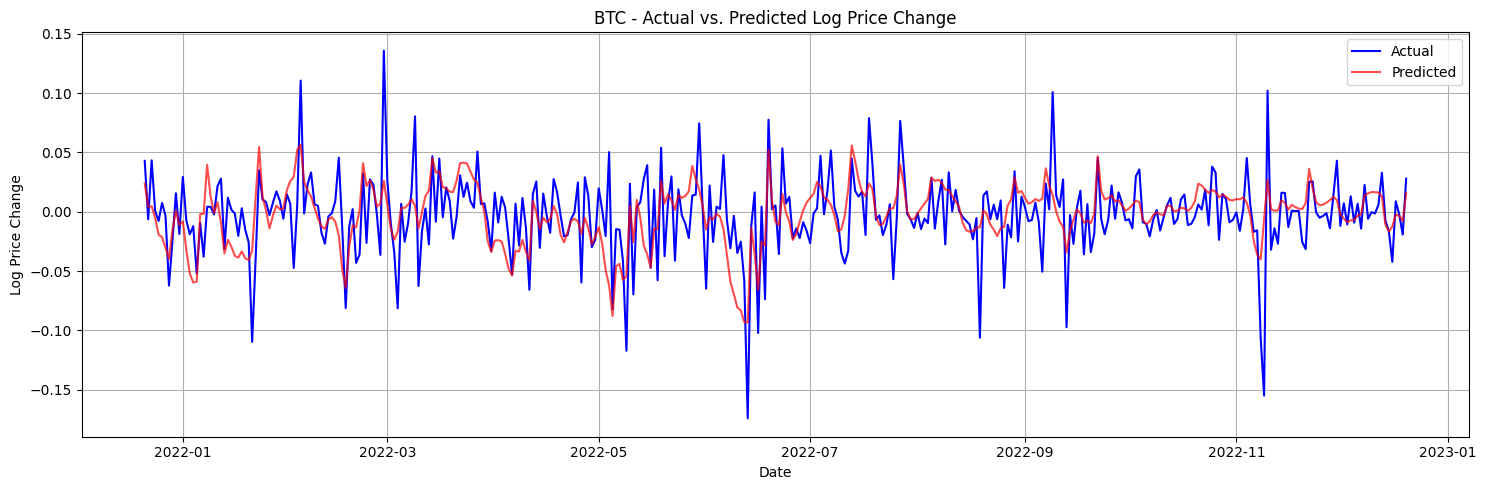

ETH - MSE: 0.0016
ETH - MAE: 0.0298


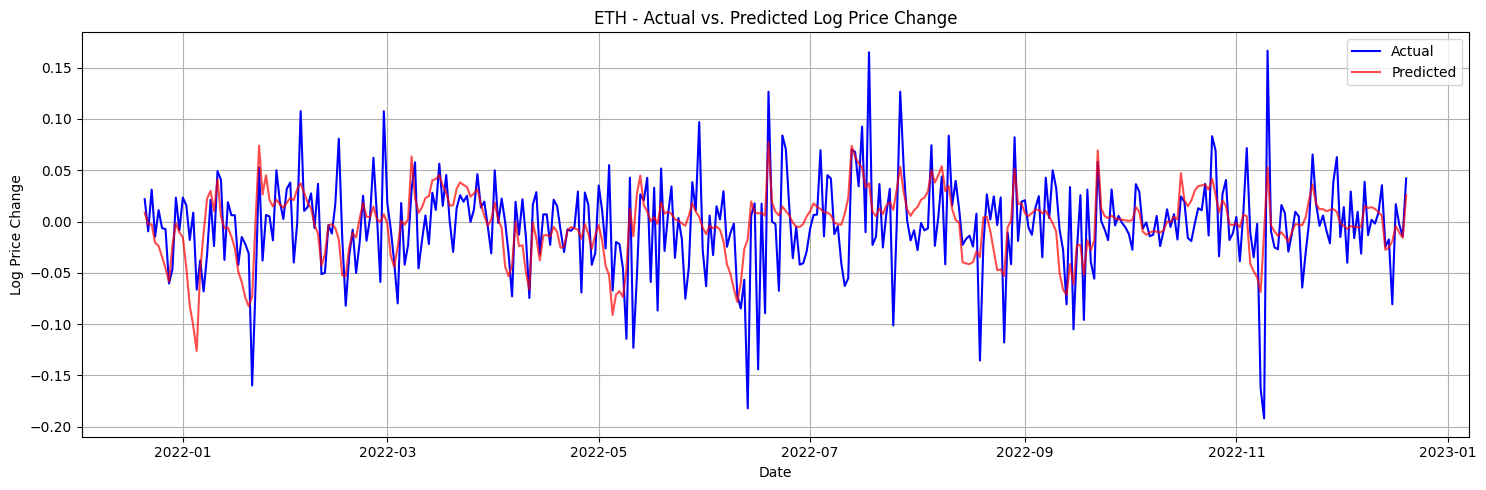

In [2]:


mse_btc, mae_btc = evaluate_and_plot(
    df_btc, y_pred_btc, "logPriceChange", "predictedLogPriceChange", "BTC"
)
mse_eth, mae_eth = evaluate_and_plot(
    df_eth, y_pred_eth, "logPriceChange", "predictedLogPriceChange", "ETH"
)


## Granger Causality

in order to understand which feature was more "influential" to the target, we'll look at how much each feature's history causes changes in the target

In [4]:
granger_results_btc = granger_causality_tests(
    df_btc, "BTC", "logPriceChange", max_lag=30
)
granger_results_eth = granger_causality_tests(
    df_eth, "ETH", "logPriceChange", max_lag=30
)


Granger Causality Test for 'BTC - logPriceChange' (max lag=30)
--------------------------------------------------


KeyError: "['BTC'] not in index"